In [1]:
import requests
import pandas as pd
import numpy as np
import lxml.html as lx

In [2]:
import requests
def get_df(url):
    response = requests.get(url)
    html = lx.fromstring(response.text)
    paragraphs = html.xpath("//p")
    content = [paragraph.text_content() for paragraph in paragraphs]
    df = pd.read_json(content[0])
    return df

Case Surveillance

In [3]:
cases = get_df("https://data.cdc.gov/resource/vbim-akqf.json")
cases

,cdc_case_earliest_dt,cdc_report_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn,pos_spec_dt
0,2020-12-09T00:00:00.000,2020-12-09T00:00:00.000,2020-12-09T00:00:00.000,Laboratory-confirmed case,Male,40 - 49 Years,Unknown,No,Missing,Missing,Missing,NaN
1,2021-12-26T00:00:00.000,2022-01-03T00:00:00.000,2021-12-26T00:00:00.000,Probable Case,Male,40 - 49 Years,Unknown,Missing,Missing,Missing,Missing,NaN
2,2020-12-01T00:00:00.000,2020-12-09T00:00:00.000,2020-12-01T00:00:00.000,Laboratory-confirmed case,Male,40 - 49 Years,Unknown,No,Missing,No,Missing,NaN
3,2021-08-28T00:00:00.000,2021-08-28T00:00:00.000,NaN,Laboratory-confirmed case,Male,40 - 49 Years,Unknown,Missing,Missing,Missing,Missing,NaN
4,2021-08-21T00:00:00.000,NaN,NaN,Laboratory-confirmed case,Male,40 - 49 Years,Unknown,Missing,Missing,Missing,Missing,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
995,2020-08-22T00:00:00.000,2020-08-22T00:00:00.000,NaN,Laboratory-confirmed case,Male,40 - 49 Years,Unknown,Missing,Missing,Missing,Missing,NaN
996,2021-11-24T00:00:00.000,2021-11-26T00:00:00.000,NaN,Laboratory-confirmed case,Male,40 - 49 Years,Unknown,Missing,Missing,No,Missing,NaN
997,2020-12-27T00:00:00.000,2021-01-12T00:00:00.000,2020-12-27T00:00:00.000,Probable Case,Male,40 - 49 Years,Unknown,No,Missing,No,Missing,NaN
998,2022-01-04T00:00:00.000,2022-01-06T00:00:00.000,NaN,Laboratory-confirmed case,Male,40 - 49 Years,Unknown,Missing,Missing,Missing,Missing,2022-01-04T00:00:00.000


United States COVID-19 Cases and Deaths by State

In [4]:
by_state = get_df("https://data.cdc.gov/resource/9mfq-cb36.json")
by_state

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,new_death,pnew_death,created_at,consent_cases,consent_deaths,conf_death,prob_death
0,2021-12-01T00:00:00.000,ND,163565,135705.0,27860.0,589,220.0,1907,9,0.0,2021-12-02 14:35:20.922,Agree,Not agree,NaN,NaN
1,2020-08-17T00:00:00.000,MD,100715,NaN,NaN,503,0.0,3765,3,0.0,2020-08-19 00:00:00.000,N/A,Agree,3616.0,149.0
2,2021-05-31T00:00:00.000,CA,3685032,3685032.0,0.0,644,0.0,62011,5,0.0,2021-06-02 00:00:00.000,Agree,Agree,62011.0,0.0
3,2021-07-20T00:00:00.000,MD,464491,NaN,NaN,155,0.0,9822,3,1.0,2021-07-22 00:00:00.000,N/A,Agree,9604.0,218.0
4,2020-02-06T00:00:00.000,NE,0,NaN,NaN,0,NaN,0,0,NaN,2020-03-26 16:22:39.452,Agree,Agree,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2021-03-03T00:00:00.000,NH,75990,NaN,NaN,187,60.0,1175,5,1.0,2021-03-04 15:08:33.824,Not agree,Not agree,NaN,NaN
996,2020-02-18T00:00:00.000,AL,0,0.0,0.0,0,0.0,0,0,0.0,2020-02-20 00:00:00.000,Agree,Agree,0.0,0.0
997,2022-02-25T00:00:00.000,NV,681387,644569.0,36818.0,1672,1188.0,9664,51,0.0,2022-02-26 14:15:52.215,Agree,NaN,NaN,NaN
998,2020-07-06T00:00:00.000,VT,1149,NaN,NaN,2,0.0,55,0,0.0,2020-07-08 00:00:00.000,Not agree,Not agree,NaN,NaN


In [5]:
pfizer = get_df("https://data.cdc.gov/resource/saz5-9hgg.json")
pfizer

,jurisdiction,week_of_allocations,_1st_dose_allocations,_2nd_dose_allocations
0,Connecticut,2021-06-21T00:00:00.000,54360,54360
1,Maine,2021-06-21T00:00:00.000,21420,21420
2,Massachusetts,2021-06-21T00:00:00.000,104580,104580
3,New Hampshire,2021-06-21T00:00:00.000,21420,21420
4,Rhode Island,2021-06-21T00:00:00.000,17280,17280
...,...,...,...,...
995,Hawaii,2021-03-08T00:00:00.000,18720,18720
996,Nevada,2021-03-08T00:00:00.000,36270,36270
997,American Samoa,2021-03-08T00:00:00.000,0,0
998,Guam,2021-03-08T00:00:00.000,0,0


In [6]:
moderna = get_df("https://data.cdc.gov/resource/b7pe-5nws.json")
moderna

,jurisdiction,week_of_allocations,_1st_dose_allocations,_2nd_dose_allocations
0,Connecticut,2021-06-21T00:00:00.000,41220,41220
1,Maine,2021-06-21T00:00:00.000,15800,15800
2,Massachusetts,2021-06-21T00:00:00.000,79500,79500
3,New Hampshire,2021-06-21T00:00:00.000,15800,15800
4,Rhode Island,2021-06-21T00:00:00.000,12480,12480
...,...,...,...,...
995,Hawaii,2021-03-08T00:00:00.000,14200,14200
996,Nevada,2021-03-08T00:00:00.000,28500,28500
997,American Samoa,2021-03-08T00:00:00.000,0,0
998,Guam,2021-03-08T00:00:00.000,0,0


In [7]:
test = requests.get("https://data.cdc.gov/api/id/q9mh-h2tw.json")

In [56]:
hesitancy = pd.read_json("https://data.cdc.gov/api/id/q9mh-h2tw.json")

In [10]:
#tabs = pd.read_html("https://en.wikipedia.org/wiki/Political_party_strength_in_U.S._states")

import urllib.request as urlrq
import certifi
import ssl

resp = urlrq.urlopen("https://en.wikipedia.org/wiki/Political_party_strength_in_U.S._states", context=ssl.create_default_context(cafile=certifi.where()))

In [38]:
response = requests.get("https://en.wikipedia.org/wiki/Political_party_strength_in_U.S._states")
html = lx.fromstring(response.text)
html

tab = html.xpath("//table")[5]
content = [t.text_content() for t in tab]

In [46]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
lst= pd.read_html("https://en.wikipedia.org/wiki/Political_party_strength_in_U.S._states")

In [66]:
df = pd.DataFrame(lst[5])
df = df.rename(columns={"State": "state", 'Party registration or identification (% as of 2020': "Party identification"})

In [81]:
df['state'] = [state.lower() for state in df['state']]
hesitancy['state'] = [state.lower() for state in hesitancy['state']]

In [82]:
corr_df = hesitancy.merge(df, on='state')
corr_df

,fips_code,county_name,state,estimated_hesitant,estimated_hesitant_or_unsure,estimated_strongly_hesitant,social_vulnerability_index,svi_category,ability_to_handle_a_covid,cvac_category,...,:@computed_region_hjsp_umg2,:@computed_region_skr5_azej,2020 presidentialelection,Governor,State Senate,State House,SeniorU.S. Senator,JuniorU.S. Senator,U.S. House of Representatives,Party identification
0,1123,"Tallapoosa County, Alabama",alabama,0.1806,0.2400,0.1383,0.89,Very High Vulnerability,0.64,High Concern,...,29,94,Republican,Republican,Republican 27–8,Republican 77–28,Republican,Republican,Republican 6–1,Republican52–35[a]
1,1121,"Talladega County, Alabama",alabama,0.1783,0.2350,0.1368,0.87,Very High Vulnerability,0.84,Very High Concern,...,29,94,Republican,Republican,Republican 27–8,Republican 77–28,Republican,Republican,Republican 6–1,Republican52–35[a]
2,1131,"Wilcox County, Alabama",alabama,0.1735,0.2357,0.1337,0.93,Very High Vulnerability,0.94,Very High Concern,...,29,94,Republican,Republican,Republican 27–8,Republican 77–28,Republican,Republican,Republican 6–1,Republican52–35[a]
3,1129,"Washington County, Alabama",alabama,0.1735,0.2357,0.1337,0.73,High Vulnerability,0.82,Very High Concern,...,29,94,Republican,Republican,Republican 27–8,Republican 77–28,Republican,Republican,Republican 6–1,Republican52–35[a]
4,1133,"Winston County, Alabama",alabama,0.1805,0.2313,0.1379,0.70,High Vulnerability,0.80,High Concern,...,29,94,Republican,Republican,Republican 27–8,Republican 77–28,Republican,Republican,Republican 6–1,Republican52–35[a]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,19029,"Cass County, Iowa",iowa,0.1323,0.1905,0.0795,0.20,Very Low Vulnerability,0.09,Very Low Concern,...,16,299,Republican,Republican,Republican 32–18,Republican 59–41,Republican,Republican,Republican 3–1,Democratic33–32[c][17]
995,19171,"Tama County, Iowa",iowa,0.1293,0.1877,0.0781,0.33,Low Vulnerability,0.10,Very Low Concern,...,16,299,Republican,Republican,Republican 32–18,Republican 59–41,Republican,Republican,Republican 3–1,Democratic33–32[c][17]
996,19085,"Harrison County, Iowa",iowa,0.1323,0.1905,0.0795,0.06,Very Low Vulnerability,0.02,Very Low Concern,...,16,299,Republican,Republican,Republican 32–18,Republican 59–41,Republican,Republican,Republican 3–1,Democratic33–32[c][17]
997,19173,"Taylor County, Iowa",iowa,0.1362,0.1966,0.0841,0.28,Low Vulnerability,0.14,Very Low Concern,...,16,299,Republican,Republican,Republican 32–18,Republican 59–41,Republican,Republican,Republican 3–1,Democratic33–32[c][17]


In [92]:
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

by_state['state'] = [states[state].lower() for state in by_state['state']]

In [95]:
corr_df = corr_df.merge(by_state, on = 'state')
corr_df

,fips_code,county_name,state,estimated_hesitant,estimated_hesitant_or_unsure,estimated_strongly_hesitant,social_vulnerability_index,svi_category,ability_to_handle_a_covid,cvac_category,...,new_case,pnew_case,tot_death,new_death,pnew_death,created_at,consent_cases,consent_deaths,conf_death,prob_death
0,1123,"Tallapoosa County, Alabama",alabama,0.1806,0.2400,0.1383,0.89,Very High Vulnerability,0.64,High Concern,...,4422,1379.0,14112,77,10.0,2021-09-12 00:00:00.000,Agree,Agree,11016.0,3096.0
1,1123,"Tallapoosa County, Alabama",alabama,0.1806,0.2400,0.1383,0.89,Very High Vulnerability,0.64,High Concern,...,487,120.0,10924,9,1.0,2021-03-28 00:00:00.000,Agree,Agree,8724.0,2200.0
2,1123,"Tallapoosa County, Alabama",alabama,0.1806,0.2400,0.1383,0.89,Very High Vulnerability,0.64,High Concern,...,12845,3190.0,16997,36,12.0,2022-01-15 00:00:00.000,Agree,Agree,13183.0,3814.0
3,1123,"Tallapoosa County, Alabama",alabama,0.1806,0.2400,0.1383,0.89,Very High Vulnerability,0.64,High Concern,...,139,62.0,11444,3,1.0,2021-06-12 00:00:00.000,Agree,Agree,9136.0,2308.0
4,1123,"Tallapoosa County, Alabama",alabama,0.1806,0.2400,0.1383,0.89,Very High Vulnerability,0.64,High Concern,...,822,140.0,4597,19,5.0,2020-11-03 00:00:00.000,Agree,Agree,3938.0,659.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17714,18149,"Starke County, Indiana",indiana,0.1316,0.1775,0.0825,0.34,Low Vulnerability,0.79,High Concern,...,2104,0.0,15462,0,0.0,2021-09-27 00:00:00.000,Not agree,Agree,14972.0,490.0
17715,18149,"Starke County, Indiana",indiana,0.1316,0.1775,0.0825,0.34,Low Vulnerability,0.79,High Concern,...,1244,0.0,12113,33,5.0,2021-02-13 00:00:00.000,Not agree,Agree,11741.0,372.0
17716,18149,"Starke County, Indiana",indiana,0.1316,0.1775,0.0825,0.34,Low Vulnerability,0.79,High Concern,...,7922,0.0,17316,69,5.0,2021-11-23 14:18:53.686,Not agree,Agree,16737.0,579.0
17717,18149,"Starke County, Indiana",indiana,0.1316,0.1775,0.0825,0.34,Low Vulnerability,0.79,High Concern,...,363,0.0,1992,20,2.0,2020-05-26 00:00:00.000,Not agree,Agree,1843.0,149.0


In [ ]:
county_age = pd.read_csv("C:\\Users\\chris\\Documents\\STA 141B\\county_age_dist.csv")
def pop_proportion(row):
    # i is the column of the age bin
    total = sum(row[1:]) # exclude fips in column 0
    return total

county_age['pop_sum'] = county_age.apply(pop_proportion, axis = 1)

C:\Users\chris\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='estimated_hesitant', ylabel='tot_cases'>

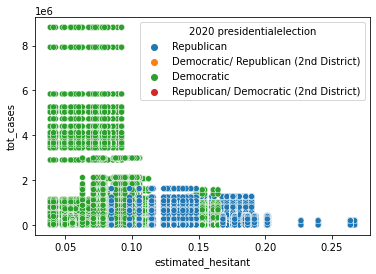

In [99]:
import seaborn as sns
sns.scatterplot(corr_df['estimated_hesitant'], corr_df['tot_cases'], hue=corr_df['2020 presidentialelection'])